<a href="https://colab.research.google.com/github/mahadi0007/Ml-classification-experiments/blob/main/Multi_Layer_Perceptron_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


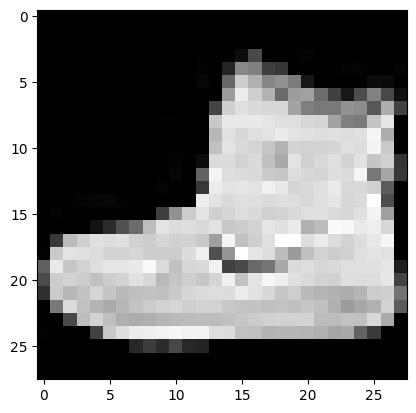

In [ ]:
from IPython import get_ipython
from IPython.display import display

import tensorflow as tf
from numpy import argmax
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Flatten
import matplotlib.pyplot as plt

# Import data
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

# print(train_images, test_images)

# Display the first image from the training set
plt.imshow(train_images[0], cmap='gray')
plt.show()

In [ ]:
# Prepare input
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
print(train_images.shape)
# normalizing the data to help with the training
train_images /= 255
test_images /= 255

(60000, 28, 28)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1072/1072 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7867 - loss: 0.6079
Epoch 2/20
1072/1072 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.8627 - loss: 0.3735
Epoch 3/20
1072/1072 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - accuracy: 0.8800 - loss: 0.3266
Epoch 4/20
1072/1072 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.8879 - loss: 0.3013
Epoch 5/20
1072/1072 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8958 - loss: 0.2769
Epoch 6/20
1072/1072 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9016 - loss: 0.2621
Epoch 7/20
1072/1072 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9040 - loss: 0.2506
Epoch 8/20
1072/1072 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9090 - loss: 0.2401
Epoch 9/20
1072/1072 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9121 - loss: 0.2298
Epoch 10/20
1072/1072 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9177 - loss: 0.2173
Epoch 11/20
1072/1072 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9203 - loss: 0.2097
Epoch 12/20
1072/1072 ━

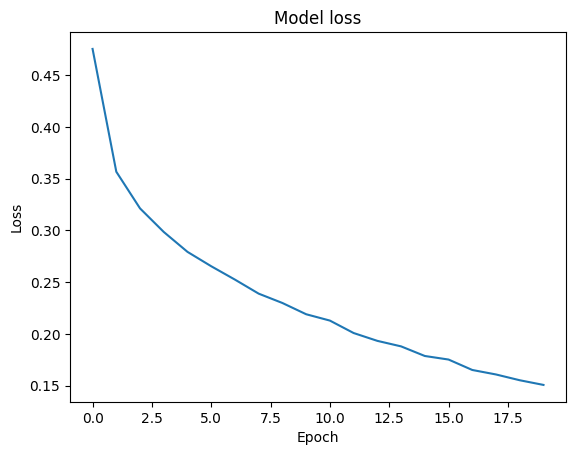

In [ ]:
# define model
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(256, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(256, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(10, activation='softmax'))
# compile the model
model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# fit the model
history = model.fit(train_images, train_labels, epochs=20, batch_size=56,
verbose=1)

# evaluate the model
loss, acc = model.evaluate(test_images, test_labels, verbose=0)
print('Test Accuracy: %.3f' % acc)

# Plot the loss curve
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [ ]:
# predict
k = 6
test_im = tf.reshape(test_images[k],[1,28,28])
print(test_labels[k])
yhat = model.predict(test_im)
print('Predicted: %s (class=%d)' % (yhat, argmax(yhat)))

4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
Predicted: [[1.5272058e-21 3.2602742e-17 4.2844957e-13 4.5440948e-22 1.0000000e+00
  1.1084335e-29 3.0891646e-12 3.7053768e-28 6.4904627e-24 2.7736093e-37]] (class=4)


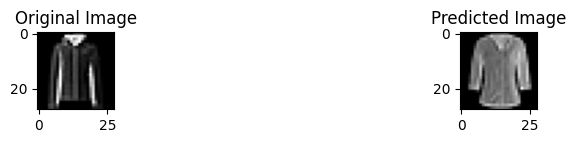

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 1))

# Display the original image on the first subplot
axes[0].imshow(tf.reshape(test_images[k], [28, 28]), cmap='gray')
axes[0].set_title('Original Image')

# Display the predicted on the second subplot
axes[1].imshow(tf.reshape(test_images[argmax(yhat)], [28, 28]), cmap='gray')
axes[1].set_title('Predicted Image')

# Show the plot with both subplots
plt.show()